In [3]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext

In [4]:
sc= SparkContext()
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [9]:
boston_df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('/content/sample_data/boston.csv')

### Data Exploration

In [14]:
boston_df.head(5)

[Row(CRIM=0.00632, ZN=18.0, INDUS=2.309999943, CHAS=0, NOX=0.537999988, RM=6.574999809, AGE=65.19999695, DIS=4.090000153, RAD=1, TAX=296, PT=15.30000019, B=396.8999939, LSTAT=4.980000019, MV=24.0),
 Row(CRIM=0.027310001, ZN=0.0, INDUS=7.070000172, CHAS=0, NOX=0.469000012, RM=6.421000004, AGE=78.90000153, DIS=4.967100143, RAD=2, TAX=242, PT=17.79999924, B=396.8999939, LSTAT=9.140000343, MV=21.60000038),
 Row(CRIM=0.02729, ZN=0.0, INDUS=7.070000172, CHAS=0, NOX=0.469000012, RM=7.184999943, AGE=61.09999847, DIS=4.967100143, RAD=2, TAX=242, PT=17.79999924, B=392.8299866, LSTAT=4.03000021, MV=34.70000076),
 Row(CRIM=0.032370001, ZN=0.0, INDUS=2.180000067, CHAS=0, NOX=0.458000004, RM=6.998000145, AGE=45.79999924, DIS=6.062200069, RAD=3, TAX=222, PT=18.70000076, B=394.6300049, LSTAT=2.940000057, MV=33.40000153),
 Row(CRIM=0.069049999, ZN=0.0, INDUS=2.180000067, CHAS=0, NOX=0.458000004, RM=7.146999836, AGE=54.20000076, DIS=6.062200069, RAD=3, TAX=222, PT=18.70000076, B=396.8999939, LSTAT=5.329

In [10]:
boston_df.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: integer (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: integer (nullable = true)
 |-- TAX: integer (nullable = true)
 |-- PT: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MV: double (nullable = true)



In [13]:
boston_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
CRIM,506,3.6135235608162057,8.601545086715594,0.00632,88.97619629
ZN,506,11.363636363636363,23.32245299451514,0.0,100.0
INDUS,506,11.136778749531626,6.86035298095724,0.460000008,27.73999977
CHAS,506,0.0691699604743083,0.2539940413404101,0,1
NOX,506,0.5546950602312246,0.1158776754570543,0.38499999,0.870999992
RM,506,6.28463438896641,0.7026171549511354,3.561000109,8.779999733
AGE,506,68.57490120115612,28.148861532793276,2.900000095,100.0
DIS,506,3.7950426960059325,2.105710142043288,1.129600048,12.12650013
RAD,506,9.549407114624506,8.707259384239366,1,24


#### Get the correlation between dependent and independent variables

#### Ploting Scatter Matrix to check the relation between Dependent and Independent Variables.

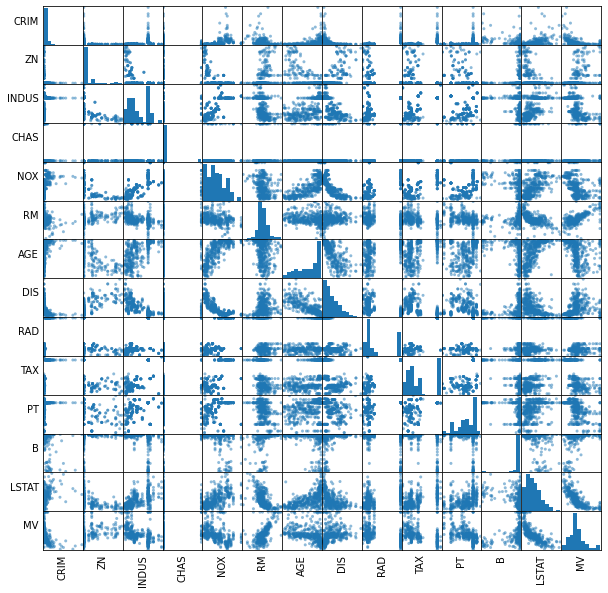

In [15]:
import pandas as pd
num_features = [t[0] for t in boston_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = boston_df.select(num_features).sample(False, 0.8).toPandas()

from pandas.plotting import scatter_matrix


axs = scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
	v = axs[i, 0]
	v.yaxis.label.set_rotation(0)
	v.yaxis.label.set_ha('right')
	v.set_yticks(())
	h = axs[n-1, i]
	h.xaxis.label.set_rotation(90)
	h.set_xticks(())

*It's hard to find or see any proper relation. So we are going to find the correlation between Independent and Dependent variables.*

In [16]:
import six
for i in boston_df.columns:
    if not( isinstance(boston_df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to MV for ", i, boston_df.stat.corr('MV',i))

Correlation to MV for  CRIM -0.3883046116575088
Correlation to MV for  ZN 0.36044534463752903
Correlation to MV for  INDUS -0.48372517128143383
Correlation to MV for  CHAS 0.17526017775291847
Correlation to MV for  NOX -0.4273207763683772
Correlation to MV for  RM 0.695359937127267
Correlation to MV for  AGE -0.37695456714288667
Correlation to MV for  DIS 0.24992873873512172
Correlation to MV for  RAD -0.3816262315669168
Correlation to MV for  TAX -0.46853593528654536
Correlation to MV for  PT -0.5077867038116085
Correlation to MV for  B 0.3334608226834164
Correlation to MV for  LSTAT -0.7376627294671615
Correlation to MV for  MV 1.0


*We are going to keep all the variables as there in no strong correlation between any of them.*

*We need only 2 columns to build the model. [MV, features]*

In [17]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                                               'DIS', 'RAD', 'TAX', 'PT', 'B', 'LSTAT'], outputCol = 'features')
vector_boston = vectorAssembler.transform(boston_df)
vector_boston = vector_boston.select(['features', 'MV'])
vector_boston.show(5)

+--------------------+-----------+
|            features|         MV|
+--------------------+-----------+
|[0.00632,18.0,2.3...|       24.0|
|[0.027310001,0.0,...|21.60000038|
|[0.02729,0.0,7.07...|34.70000076|
|[0.032370001,0.0,...|33.40000153|
|[0.069049999,0.0,...|36.20000076|
+--------------------+-----------+
only showing top 5 rows



In [18]:
splits = vector_boston.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

#### Building a linear regression model to predict house price

---


#### Evaluate the Linear Regression model by getting the RMSE and R-squared values

In [19]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='MV', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.0352555795742582,0.020962266218763504,0.0,2.2096778485928006,-9.883918990827038,3.8626100898647806,0.0,-0.971827884730053,0.0015549383134745593,0.0,-0.69709644885241,0.008529155634482664,-0.5308551091008433]
Intercept: 23.86982867583755


In [21]:
trainSummary = lr_model.summary
print("RMSE: %f" % trainSummary.rootMeanSquaredError)
print("RSquared: %f" % trainSummary.r2)

RMSE: 5.162391
RSquared: 0.684675


*RMSE measures the differences between predicted values by the model and the actual values. However, RMSE alone is meaningless until we compare with the actual “MV” value, such as mean, min and max.*

In [22]:
train_df.describe().show()

+-------+------------------+
|summary|                MV|
+-------+------------------+
|  count|               349|
|   mean|22.872206321836682|
| stddev| 9.206503916909817|
|    min|               5.0|
|    max|              50.0|
+-------+------------------+



*RSquared at 0.68 means that in our model approx 68% of the variability in "MV" can be explained. It is not worst but we can work with it. However, we must be cautious that the performance on the training set may not a good approximation of the performance on the test set.*

In [23]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","MV","features").show(7)

from pyspark.ml.evaluation import RegressionEvaluator

lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="MV",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+-----------+--------------------+
|        prediction|         MV|            features|
+------------------+-----------+--------------------+
| 29.67449759288142|35.40000153|[0.01311,90.0,1.2...|
| 35.06094938322708|       44.0|[0.01538,90.0,3.7...|
|24.719484461230227|       33.0|[0.019509999,17.5...|
|20.335733323462705|20.10000038|[0.019649999,80.0...|
|25.590293546558676|24.70000076|[0.02055,85.0,0.7...|
|31.196473276144452|31.10000038|[0.02187,60.0,2.9...|
|27.700481295708077|       25.0|[0.028750001,28.0...|
+------------------+-----------+--------------------+
only showing top 7 rows

R Squared (R2) on test data = 0.792773


In [24]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 4.15671


*We got the worst results on test data for RMSE whereas we see that RSquared is sligthy better. Reason for this is that there maybe inherent variability of data which may affect the R2.*

#### Making few predictions to our Linear Regression Model.

In [25]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","MV","features").show()

+------------------+-----------+--------------------+
|        prediction|         MV|            features|
+------------------+-----------+--------------------+
| 29.67449759288142|35.40000153|[0.01311,90.0,1.2...|
| 35.06094938322708|       44.0|[0.01538,90.0,3.7...|
|24.719484461230227|       33.0|[0.019509999,17.5...|
|20.335733323462705|20.10000038|[0.019649999,80.0...|
|25.590293546558676|24.70000076|[0.02055,85.0,0.7...|
|31.196473276144452|31.10000038|[0.02187,60.0,2.9...|
|27.700481295708077|       25.0|[0.028750001,28.0...|
|25.192449353951687|26.60000038|[0.02899,40.0,1.2...|
|31.251542398246468|       28.5|[0.035020001,80.0...|
|22.539316197714008|20.70000076|[0.037379999,0.0,...|
| 33.59648308931645|34.59999847|[0.03768,80.0,1.5...|
|  25.5759428774881|20.60000038|[0.042939998,28.0...|
|26.802831157546063|23.89999962|[0.04462,25.0,4.8...|
| 23.54845103269054|20.60000038|[0.04527,0.0,11.9...|
| 26.03531733542094|22.29999924|[0.045899998,52.5...|
|29.828807659642365|28.20000